Traffic Volume and Composition Analysis:

Read and merge data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_traffic_count = pd.read_csv("traffic_count_cleaned_data.csv")
data_road_corridors = pd.read_csv("CleanData-road-corridors.csv")

merged_data = pd.merge(data_traffic_count,data_road_corridors,left_on="road_segment",right_on="seg_id")
print(merged_data)

             date        road_name                    location       suburb  \
0      2014-10-11  Wolseley Parade  North East of Derby Street   Kensington   
1      2014-10-11  Wolseley Parade  North East of Derby Street   Kensington   
2      2014-10-11  Wolseley Parade  North East of Derby Street   Kensington   
3      2014-11-11  Wolseley Parade  North East of Derby Street   Kensington   
4      2014-11-11  Wolseley Parade  North East of Derby Street   Kensington   
...           ...              ...                         ...          ...   
57726  2014-11-20      Hope Street              66 Hope Street  South Yarra   
57727  2014-11-20      Hope Street              66 Hope Street  South Yarra   
57728  2014-11-21      Hope Street              66 Hope Street  South Yarra   
57729  2014-11-21      Hope Street              66 Hope Street  South Yarra   
57730  2014-11-21      Hope Street              66 Hope Street  South Yarra   

       speed_limit direction                 time  

Showing total vehicle count by class in each suburb

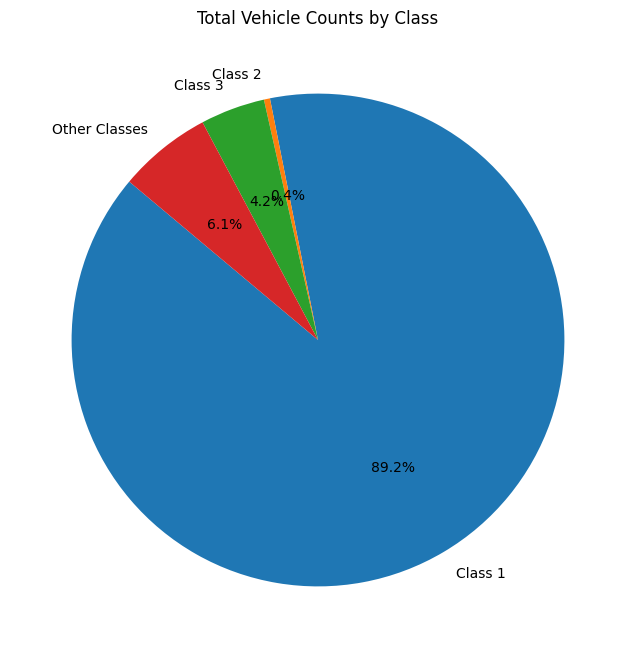

In [2]:
#calculate total vehicle in each segment/road
vehicle_counts_by_segment = merged_data.groupby("seg_id").sum().reset_index()

#calculate total vehicle in each suburb
vehicle_counts_by_suburb = merged_data.groupby("suburb").sum().reset_index()

#calculate total vehicles for each class, and group classes 4 to 8
total_vehicle_counts = vehicle_counts_by_segment[['vehicle_class_1', 'vehicle_class_2', 'vehicle_class_3']].sum()
other_vehicle_counts = vehicle_counts_by_segment[[ 'vehicle_class_4','vehicle_class_5', 'vehicle_class_6', 'vehicle_class_7', 'vehicle_class_8','vehicle_class_9','vehicle_class_10','vehicle_class_11','vehicle_class_12','vehicle_class_13','motorcycle','bike']].sum().sum()

#combine counts into one series
total_vehicle_counts = pd.concat([total_vehicle_counts, pd.Series(other_vehicle_counts, index=['Other Classes'])])

#plot pie chart for total vehicle counts by class
plt.figure(figsize=(8, 8))

labels = ['Class 1', 'Class 2', 'Class 3', 'Other Classes']

plt.pie(total_vehicle_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Vehicle Counts by Class')

plt.show()

Analysis:
When looking at the pie chart, we can see the most vehicles running in the street are in class 1, which is a short vehicle, followed by class 3 (a two-axle truck). Class 2 and the remaining class are not running in the street much.


The amount of vehicle in each suburb

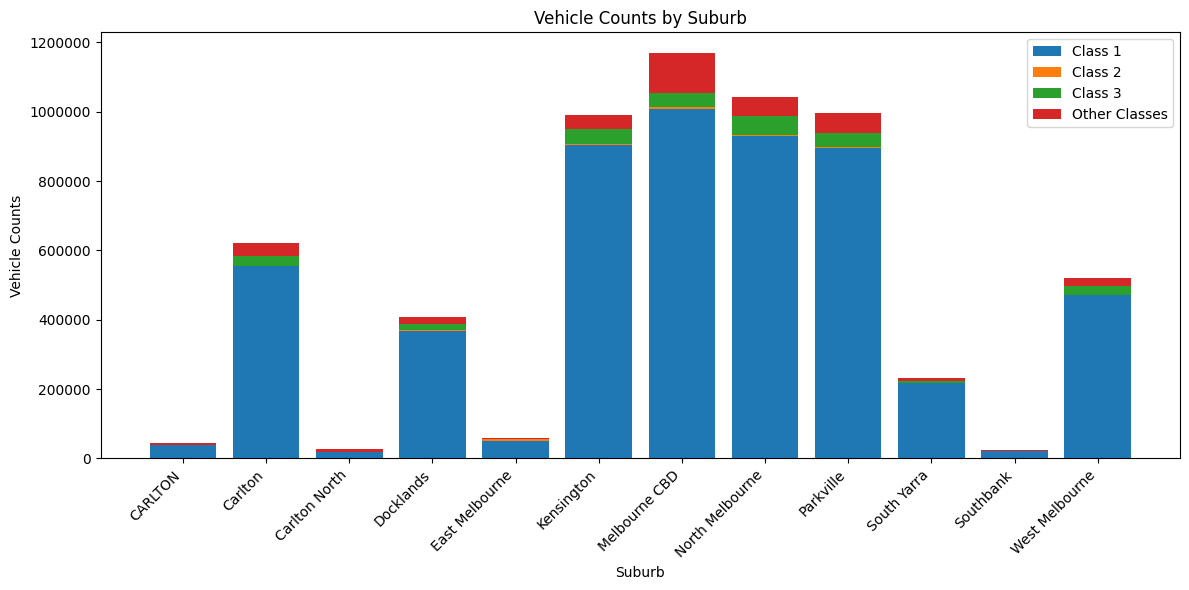

In [3]:
#calculate total vehicles for each class, and group classes 4 to 8 also motorcycle,bike
vehicle_counts_by_suburb['Other_Classes'] = vehicle_counts_by_suburb[
    ['vehicle_class_4', 'vehicle_class_5', 'vehicle_class_6', 'vehicle_class_7', 'vehicle_class_8','vehicle_class_9','vehicle_class_10','vehicle_class_11','vehicle_class_12','vehicle_class_13','motorcycle','bike']
].sum(axis=1)

#visualize vehicle counts by suburb with 'Other Classes'
plt.figure(figsize=(12, 6))
plt.bar(vehicle_counts_by_suburb['suburb'], vehicle_counts_by_suburb['vehicle_class_1'], label='Class 1')
plt.bar(vehicle_counts_by_suburb['suburb'], vehicle_counts_by_suburb['vehicle_class_2'], label='Class 2', bottom=vehicle_counts_by_suburb['vehicle_class_1'])
plt.bar(vehicle_counts_by_suburb['suburb'], vehicle_counts_by_suburb['vehicle_class_3'], label='Class 3', bottom=vehicle_counts_by_suburb['vehicle_class_1'] + vehicle_counts_by_suburb['vehicle_class_2'])
plt.bar(vehicle_counts_by_suburb['suburb'], vehicle_counts_by_suburb['Other_Classes'], label='Other Classes', bottom=vehicle_counts_by_suburb['vehicle_class_1'] + vehicle_counts_by_suburb['vehicle_class_2'] + vehicle_counts_by_suburb['vehicle_class_3'])
plt.xlabel('Suburb')
plt.ylabel('Vehicle Counts')
plt.title('Vehicle Counts by Suburb')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.show()

Analysis:
We can see that Melbourne CBD, North Melbourne, Kensington, and Parkville have the most vehicles, so the city needs to focus on this specific suburb in order to enhance infrastructure and the flow of traffic.

The amount of a vehicle at different hours in a day

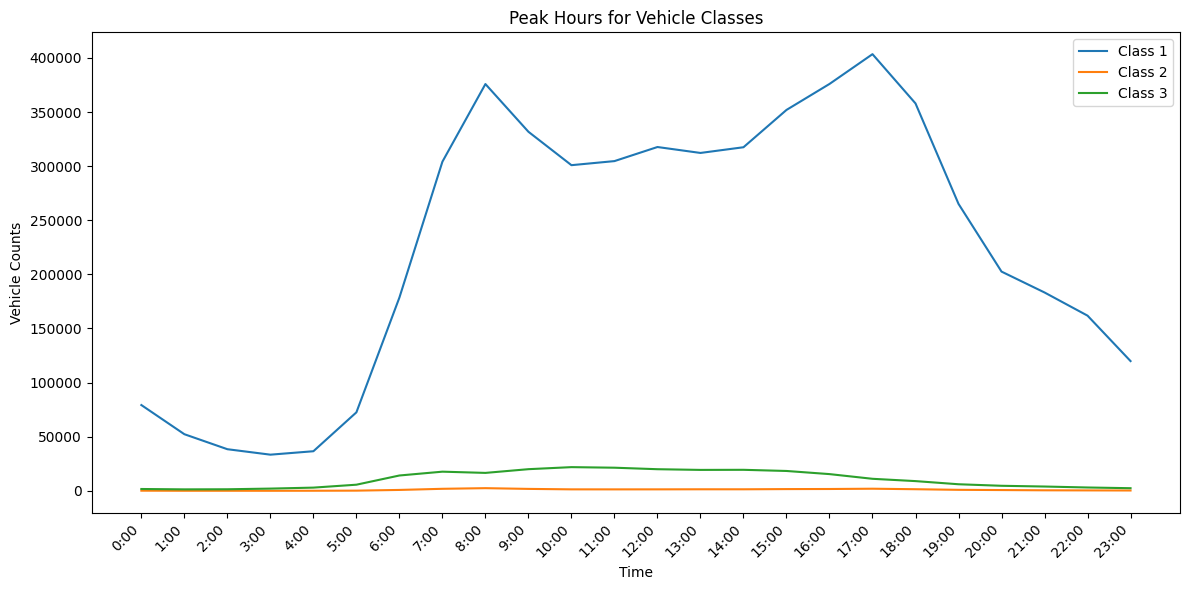

In [4]:
#convert time to datetime and extract the hour
merged_data['time'] = pd.to_datetime(merged_data['time']).dt.hour

peak_hours = merged_data.groupby("time").sum().reset_index()

#visualize peak hours for vehicle classes 1 to 3 and Other Classes
plt.figure(figsize=(12, 6))
plt.plot(peak_hours['time'], peak_hours['vehicle_class_1'], label='Class 1')
plt.plot(peak_hours['time'], peak_hours['vehicle_class_2'], label='Class 2')
plt.plot(peak_hours['time'], peak_hours['vehicle_class_3'], label='Class 3')
plt.xlabel('Time')
plt.ylabel('Vehicle Counts')
plt.title('Peak Hours for Vehicle Classes')
plt.xticks(ticks=peak_hours['time'], labels=[f'{int(hour)}:00' for hour in peak_hours['time']], rotation=45, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


analysis:
The chart provided shows clearly that there are indeed high traffic volumes of Class 1 vehicles during certain hours of the day. Major peaks occur around two prime times: from 7:00 a.m. to 9:00 a.m. and from 4:00 p.m. to 6:00 p.m. These times therefore correspond to the morning and evening rush hours, respectively, when people go to work, school, or other activities and return home. Generally, from 12:00 AM to 5:00 AM, the traffic volumes for all classes of vehicles are very low.

In comparison with Class 1, Classes 2 and 3 have relatively stable, low traffic volumes throughout the day.


top 5 suburb have the highest vehicle

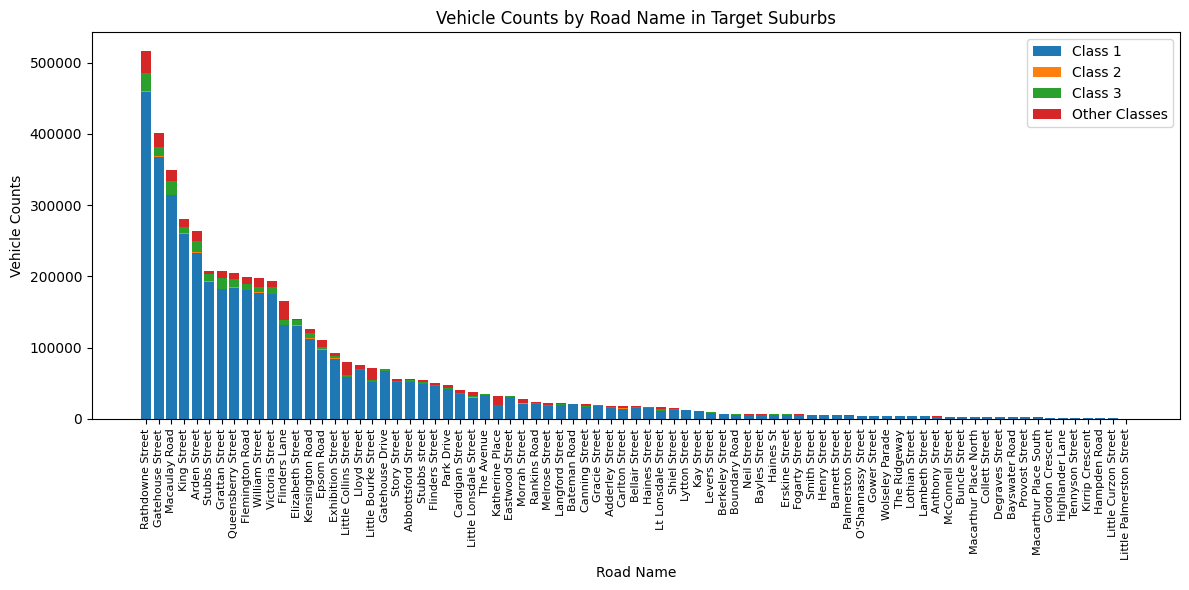

In [5]:
#filter for the specific suburbs
target_suburbs = ['Kensington', 'Melbourne CBD', 'North Melbourne', 'Parkville','Carlton']
filtered_data = merged_data[merged_data['suburb'].isin(target_suburbs)]

#calculate total vehicle counts for each road name within the filtered data
vehicle_counts_by_road_name = filtered_data.groupby('road_name').sum(numeric_only=True).reset_index()

#calculate total vehicles for each class, and group classes 4 to 13
vehicle_counts_by_road_name['Other_Classes'] = vehicle_counts_by_road_name[
    ['vehicle_class_4', 'vehicle_class_5', 'vehicle_class_6', 'vehicle_class_7', 
     'vehicle_class_8', 'vehicle_class_9', 'vehicle_class_10', 
     'vehicle_class_11', 'vehicle_class_12', 'vehicle_class_13','motorcycle','bike']
].sum(axis=1)

#create a temporary column for total vehicle count to sort by
vehicle_counts_by_road_name['Total_Count'] = (
    vehicle_counts_by_road_name['vehicle_class_1'] +
    vehicle_counts_by_road_name['vehicle_class_2'] +
    vehicle_counts_by_road_name['vehicle_class_3'] +
    vehicle_counts_by_road_name['Other_Classes']
)

#sort the DataFrame by Total_Count in descending order
vehicle_counts_by_road_name.sort_values(by='Total_Count', ascending=False, inplace=True)

#drop the temporary Total_Count column
vehicle_counts_by_road_name.drop(columns=['Total_Count'], inplace=True)


#visualize
plt.figure(figsize=(12, 6))
plt.bar(vehicle_counts_by_road_name['road_name'], vehicle_counts_by_road_name['vehicle_class_1'], label='Class 1')
plt.bar(vehicle_counts_by_road_name['road_name'], vehicle_counts_by_road_name['vehicle_class_2'], label='Class 2', bottom=vehicle_counts_by_road_name['vehicle_class_1'])
plt.bar(vehicle_counts_by_road_name['road_name'], vehicle_counts_by_road_name['vehicle_class_3'], label='Class 3', bottom=vehicle_counts_by_road_name['vehicle_class_1'] + vehicle_counts_by_road_name['vehicle_class_2'])
plt.bar(vehicle_counts_by_road_name['road_name'], vehicle_counts_by_road_name['Other_Classes'], label='Other Classes', bottom=vehicle_counts_by_road_name['vehicle_class_1'] + vehicle_counts_by_road_name['vehicle_class_2'] + vehicle_counts_by_road_name['vehicle_class_3'])
plt.xlabel('Road Name')
plt.ylabel('Vehicle Counts')
plt.title('Vehicle Counts by Road Name in Target Suburbs')
plt.xticks(rotation=90, ha='center', fontsize=8)  # Adjusting x-axis labels
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.show()



Key Insights: 

Top Roads with the Highest Vehicle Count:
Gatehouse Street has the highest count in all vehicle classes, especially Class 1 vehicles.
Macaulay Road and King Street are the next entries for high vehicle counts, majorly in Class 1 and Class 3 vehicles.
Arden Street and Stubbs Street follow with high vehicle counts in all classes.

Vehicle Class Distribution:
Class 1 vehicles, likely private cars, dominate all top road traffic counts.
Other classes, when combined from Class 4 through Class 13, have relatively small counts but are still quite significant, especially on roads like Gatehouse Street and Macaulay Road.


Recommendations for Traffic Management

Gatehouse Street: As there is a high count of vehicles, especially Class 1, widening of the road, improvement in signage and road surface conditions should be considered for easy running of the vehicles.

Macaulay Road: Similarly, such improvements should be recommended. Along with that, consider optimization of the traffic signals allowing or clearing the jam during peak hours of traffic flow.

Introduce intelligent traffic management systems on all roads, including King Street and Arden Street. This will allow dynamic management of the traffic depending upon real-time conditions.

Provide dedicated lanes for high occupancy vehicles or public transport on these heavily traveled roads to promote carpooling and reduce the number of private vehicles.

On roads with high levels of traffic flow, such as in Stubbs Street, proper pedestrian crossings and cyclist lanes should be provided to ensure the safety of pedestrians and cyclists.

Consider installing features that will help calm traffic, like speed bumps, in residential areas off these busy highways to ensure the safety of pedestrians or cyclists.

The number of vehicles in each season of the year

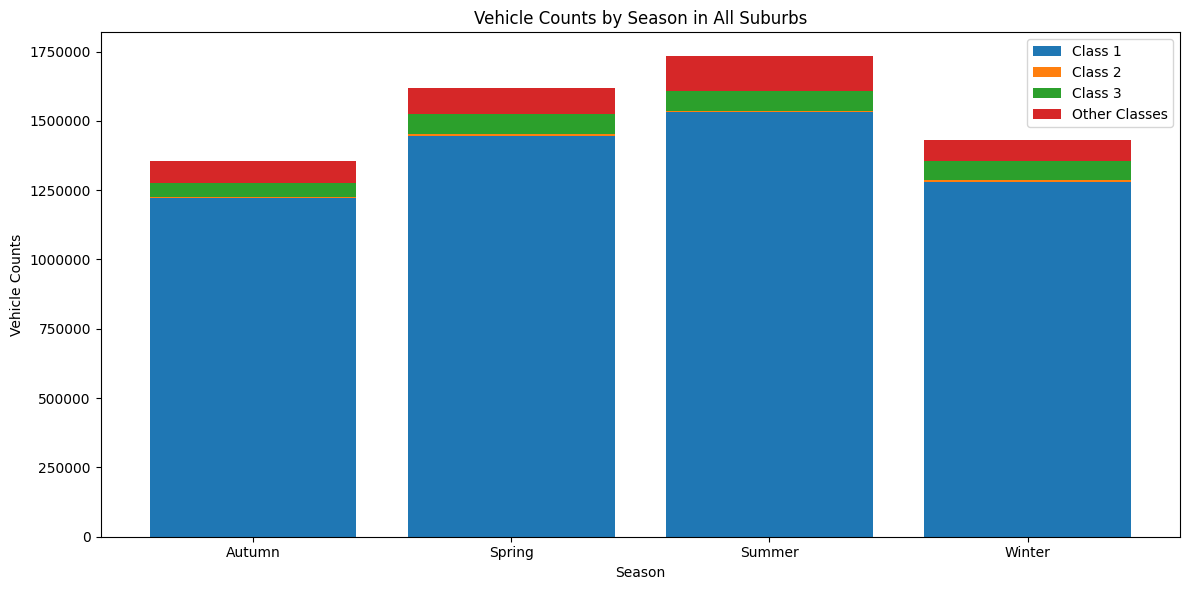

In [6]:
# Convert 'date' to datetime and extract the month
merged_data.loc[:, 'month'] = pd.to_datetime(merged_data['date']).dt.month

# Define seasons
season_dict = {12: 'Summer', 1: 'Summer', 2: 'Summer',
               3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
               6: 'Winter', 7: 'Winter', 8: 'Winter',
               9: 'Spring', 10: 'Spring', 11: 'Spring'}

merged_data.loc[:, 'season'] = merged_data['month'].map(season_dict)

# Calculate total vehicle counts for each season
vehicle_counts_by_season = merged_data.groupby('season').sum(numeric_only=True).reset_index()

# Calculate total vehicles for each class, and group classes 4 to 13
vehicle_counts_by_season['Other_Classes'] = vehicle_counts_by_season[
    ['vehicle_class_4', 'vehicle_class_5', 'vehicle_class_6', 'vehicle_class_7', 
     'vehicle_class_8', 'vehicle_class_9', 'vehicle_class_10', 
     'vehicle_class_11', 'vehicle_class_12', 'vehicle_class_13', 'motorcycle', 'bike']
].sum(axis=1)

# Visualize vehicle counts by season
plt.figure(figsize=(12, 6))
plt.bar(vehicle_counts_by_season['season'], vehicle_counts_by_season['vehicle_class_1'], label='Class 1')
plt.bar(vehicle_counts_by_season['season'], vehicle_counts_by_season['vehicle_class_2'], label='Class 2', bottom=vehicle_counts_by_season['vehicle_class_1'])
plt.bar(vehicle_counts_by_season['season'], vehicle_counts_by_season['vehicle_class_3'], label='Class 3', bottom=vehicle_counts_by_season['vehicle_class_1'] + vehicle_counts_by_season['vehicle_class_2'])
plt.bar(vehicle_counts_by_season['season'], vehicle_counts_by_season['Other_Classes'], label='Other Classes', bottom=vehicle_counts_by_season['vehicle_class_1'] + vehicle_counts_by_season['vehicle_class_2'] + vehicle_counts_by_season['vehicle_class_3'])

plt.xlabel('Season')
plt.ylabel('Vehicle Counts')
plt.title('Vehicle Counts by Season in All Suburbs')
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.show()


Reasons for Higher Vehicle Counts in Spring and Summer

The weather conditions are generally more favorable in spring and summer, thus encouraging daily commutes, leisure trips, and outdoor activities. These seasons also correspond with school holidays and vacation periods when there is more family travel and a higher number of day trips. Moreover, spring and summer are peak tourist seasons to which visitors flock, hence more local events and festivals that people will attend, adding to the number of vehicles.

Commercial activity also increases in finer weather, which includes increased delivery services, business travel, and frequent construction projects and outdoor work. These would seem to all combine to help explain the higher vehicle counts seen in the spring and summer months.

# Predict future traffic volumes for different vehicle types on specific road segments and times.

## traffic volumes for vehicle_class_1

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Convert 'date' and 'time' columns to string to concatenate them
merged_data['date'] = merged_data['date'].astype(str)
merged_data['time'] = merged_data['time'].astype(str)

# Create a new 'datetime' column by combining 'date' and 'time'
merged_data['datetime'] = pd.to_datetime(merged_data['date'] + ' ' + merged_data['time'])

# Extract the day of the week (0=Monday, 6=Sunday) and hour from 'datetime'
merged_data['day_of_week'] = merged_data['datetime'].dt.dayofweek
merged_data['hour'] = merged_data['datetime'].dt.hour

# Encode the 'road_name' column to numerical values
merged_data['road_name_encoded'] = merged_data['road_name'].astype('category').cat.codes

# Select features (X) and target (y) for the model
X = merged_data[['day_of_week', 'hour', 'road_name_encoded', 'speed_limit']]
y = merged_data['vehicle_class_1']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class 1 entries:", len(merged_data['vehicle_class_1']))


Mean Absolute Error: 37.001289161945834
Total vehicle class 1 entries: 57731


This will train a Random Forest Regressor that predicts the volume of vehicles in a certain class, vehicle_class_1, on different road segments at different times. The following code is going to generate date and time features and road information, train a model on historical data, and then assess the model using Mean Absolute Error. The goal will be to do an accurate traffic volume prediction for fine traffic management and planning.

## traffic volumes for vehicle_class_2

In [19]:
y = merged_data['vehicle_class_2']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class 2 entries:", len(merged_data['vehicle_class_2']))


Mean Absolute Error: 0.48346466922816395
Total vehicle class 2 entries: 57731


## traffic volumes for vehicle_class_3

In [20]:
y = merged_data['vehicle_class_3']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class 3 entries:", len(merged_data['vehicle_class_3']))


Mean Absolute Error: 2.6798131934266367
Total vehicle class 3 entries: 57731


## traffic volumes for vehicle_class_4

In [21]:
y = merged_data['vehicle_class_4']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class 4 entries:", len(merged_data['vehicle_class_4']))


Mean Absolute Error: 0.7011076815938858
Total vehicle class 4 entries: 57731


## traffic volumes for vehicle_class_5

In [26]:
y = merged_data['vehicle_class_5']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

# print("Predictions vs True Labels:")
# for pred, actual in zip(predictions, y_test):
#     print(f"Predicted: {pred}, Actual: {actual}")
#     
#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class 5 entries:", len(merged_data['vehicle_class_5']))


Mean Absolute Error: 0.3387668665839631
Total vehicle class 5 entries: 57731


## traffic volumes for vehicle_class_6

In [27]:
y = merged_data['vehicle_class_6']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

# print("Predictions vs True Labels:")
# for pred, actual in zip(predictions, y_test):
#     print(f"Predicted: {pred}, Actual: {actual}")
#     
#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class 6 entries:", len(merged_data['vehicle_class_6']))


Mean Absolute Error: 0.13568450816883854
Total vehicle class 6 entries: 57731


## traffic volumes for vehicle_class_7

In [28]:
y = merged_data['vehicle_class_7']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

# print("Predictions vs True Labels:")
# for pred, actual in zip(predictions, y_test):
#     print(f"Predicted: {pred}, Actual: {actual}")
#     
#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class 7 entries:", len(merged_data['vehicle_class_7']))


Mean Absolute Error: 0.09811770774591345
Total vehicle class 7 entries: 57731


## traffic volumes for vehicle_class_8

In [30]:
y = merged_data['vehicle_class_8']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

# print("Predictions vs True Labels:")
# for pred, actual in zip(predictions, y_test):
#     print(f"Predicted: {pred}, Actual: {actual}")
#     
#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class 8 entries:", len(merged_data['vehicle_class_8']))


Mean Absolute Error: 0.05657299180150547
Total vehicle class 8 entries: 57731


## traffic volumes for vehicle_class_9

In [ ]:
y = merged_data['vehicle_class_9']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

# print("Predictions vs True Labels:")
# for pred, actual in zip(predictions, y_test):
#     print(f"Predicted: {pred}, Actual: {actual}")
#     
#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class 9 entries:", len(merged_data['vehicle_class_9']))


## traffic volumes for vehicle_class_10

In [31]:
y = merged_data['vehicle_class_10']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

# print("Predictions vs True Labels:")
# for pred, actual in zip(predictions, y_test):
#     print(f"Predicted: {pred}, Actual: {actual}")
#     
#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class 10 entries:", len(merged_data['vehicle_class_10']))


Mean Absolute Error: 0.03370157637983193
Total vehicle class 10 entries: 57731


## traffic volumes for vehicle_class_11

In [32]:
y = merged_data['vehicle_class_11']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

# print("Predictions vs True Labels:")
# for pred, actual in zip(predictions, y_test):
#     print(f"Predicted: {pred}, Actual: {actual}")
#     
#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class 11 entries:", len(merged_data['vehicle_class_11']))


Mean Absolute Error: 0.01254923629371322
Total vehicle class 11 entries: 57731


## traffic volumes for motorcycle

In [33]:
y = merged_data['motorcycle']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

# print("Predictions vs True Labels:")
# for pred, actual in zip(predictions, y_test):
#     print(f"Predicted: {pred}, Actual: {actual}")
#     
#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class motorcycle entries:", len(merged_data['motorcycle']))


Mean Absolute Error: 1.0480894612548626
Total vehicle class motorcycle entries: 57731


## traffic volumes for bike

In [34]:
y = merged_data['bike']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions
predictions = model.predict(X_test)

# print("Predictions vs True Labels:")
# for pred, actual in zip(predictions, y_test):
#     print(f"Predicted: {pred}, Actual: {actual}")
#     
#evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

#print the total number of entries for vehicle_class_1
print("Total vehicle class bike entries:", len(merged_data['bike']))


Mean Absolute Error: 3.1973197197594407
Total vehicle class bike entries: 57731
